<a href="https://colab.research.google.com/github/alisha-q/leukemia-detection-labs/blob/main/6_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔬 Leukemia Classification - Data Exploration

**Project:** Leukemia Image Classification using Deep Learning

**Goal:** Explore and understand the leukemia dataset structure

---
## 1️⃣ Check GPU Availability

In [1]:
import tensorflow as tf

# Check for GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print('✅ GPU Available!')
    for gpu in gpus:
        print(f'   {gpu}')
else:
    print('❌ No GPU found. Using CPU.')
    print('💡 Enable GPU: Runtime → Change runtime type → GPU')

✅ GPU Available!
   PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


---
## 2️⃣ Mount Google Drive (Optional)

Mount Drive to save your work permanently.

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

print('✅ Google Drive mounted successfully!')

---
## 3️⃣ Download Leukemia Dataset from Kaggle

**Dataset:** [Leukemia Classification](https://www.kaggle.com/datasets/andrewmvd/leukemia-classification)

**Note:** This will download ~1GB of data

In [2]:
# Install kagglehub
!pip install kagglehub -q

import kagglehub

# Download dataset
print('📥 Downloading dataset...')
path = kagglehub.dataset_download('andrewmvd/leukemia-classification')

print(f'✅ Dataset downloaded!')
print(f'📁 Path: {path}')

📥 Downloading dataset...
Using Colab cache for faster access to the 'leukemia-classification' dataset.
✅ Dataset downloaded!
📁 Path: /kaggle/input/leukemia-classification


---
## 4️⃣ Explore Dataset Structure

In [3]:
import os

# Check what's in the dataset
print('📂 Root directory contents:')
print(os.listdir(path))

# Check C-NMC_Leukemia folder
leukemia_path = os.path.join(path, 'C-NMC_Leukemia')
print('\n📂 C-NMC_Leukemia contents:')
print(os.listdir(leukemia_path))

# Check training data
train_path = os.path.join(leukemia_path, 'training_data')
print('\n📂 Training data contents:')
print(os.listdir(train_path))

📂 Root directory contents:
['C-NMC_Leukemia']

📂 C-NMC_Leukemia contents:
['validation_data', 'training_data', 'testing_data']

📂 Training data contents:
['fold_0', 'fold_1', 'fold_2']


---
## 5️⃣ Understand Dataset Organization

**Structure:**
```
C-NMC_Leukemia/
├── training_data/
│   ├── fold_0/
│   │   ├── all/  (Leukemia cells)
│   │   └── hem/  (Normal/Healthy cells)
│   ├── fold_1/
│   └── fold_2/
└── validation_data/
    ├── C-NMC_test_prelim_phase_data/
    └── C-NMC_test_final_phase_data/
```

In [4]:
# Check fold_0 structure
fold_0_path = os.path.join(train_path, 'fold_0')
print('📂 fold_0 contents:')
print(os.listdir(fold_0_path))

# Paths to normal and leukemia images
normal_path = os.path.join(fold_0_path, 'hem')
leukemia_path_fold = os.path.join(fold_0_path, 'all')

print(f'\n✅ Normal cells folder: {normal_path}')
print(f'✅ Leukemia cells folder: {leukemia_path_fold}')

📂 fold_0 contents:
['all', 'hem']

✅ Normal cells folder: /kaggle/input/leukemia-classification/C-NMC_Leukemia/training_data/fold_0/hem
✅ Leukemia cells folder: /kaggle/input/leukemia-classification/C-NMC_Leukemia/training_data/fold_0/all


---
## 6️⃣ Count Images in Dataset

**Classes:**
- **hem** = Healthy/Normal cells
- **all** = ALL (Acute Lymphoblastic Leukemia) cells

In [5]:
import os

# Count images in all folds
print('📊 Image Count per Fold:\n')
print(f"{'Fold':<10} {'Normal (hem)':<15} {'Leukemia (all)':<15} {'Total':<10}")
print('-' * 55)

total_normal = 0
total_leukemia = 0

for fold in ['fold_0', 'fold_1', 'fold_2']:
    fold_path = os.path.join(train_path, fold)

    normal_count = len(os.listdir(os.path.join(fold_path, 'hem')))
    leukemia_count = len(os.listdir(os.path.join(fold_path, 'all')))

    total_normal += normal_count
    total_leukemia += leukemia_count

    print(f"{fold:<10} {normal_count:<15} {leukemia_count:<15} {normal_count + leukemia_count:<10}")

print('-' * 55)
print(f"{'TOTAL':<10} {total_normal:<15} {total_leukemia:<15} {total_normal + total_leukemia:<10}")

# Calculate class balance
print(f'\n📊 Class Distribution:')
print(f'   Normal: {total_normal} ({total_normal/(total_normal+total_leukemia)*100:.1f}%)')
print(f'   Leukemia: {total_leukemia} ({total_leukemia/(total_normal+total_leukemia)*100:.1f}%)')

📊 Image Count per Fold:

Fold       Normal (hem)    Leukemia (all)  Total     
-------------------------------------------------------
fold_0     1130            2397            3527      
fold_1     1163            2418            3581      
fold_2     1096            2457            3553      
-------------------------------------------------------
TOTAL      3389            7272            10661     

📊 Class Distribution:
   Normal: 3389 (31.8%)
   Leukemia: 7272 (68.2%)


---
## 7️⃣ Load and Display 20 Sample Images

Display 10 normal cells and 10 leukemia cells in a grid.

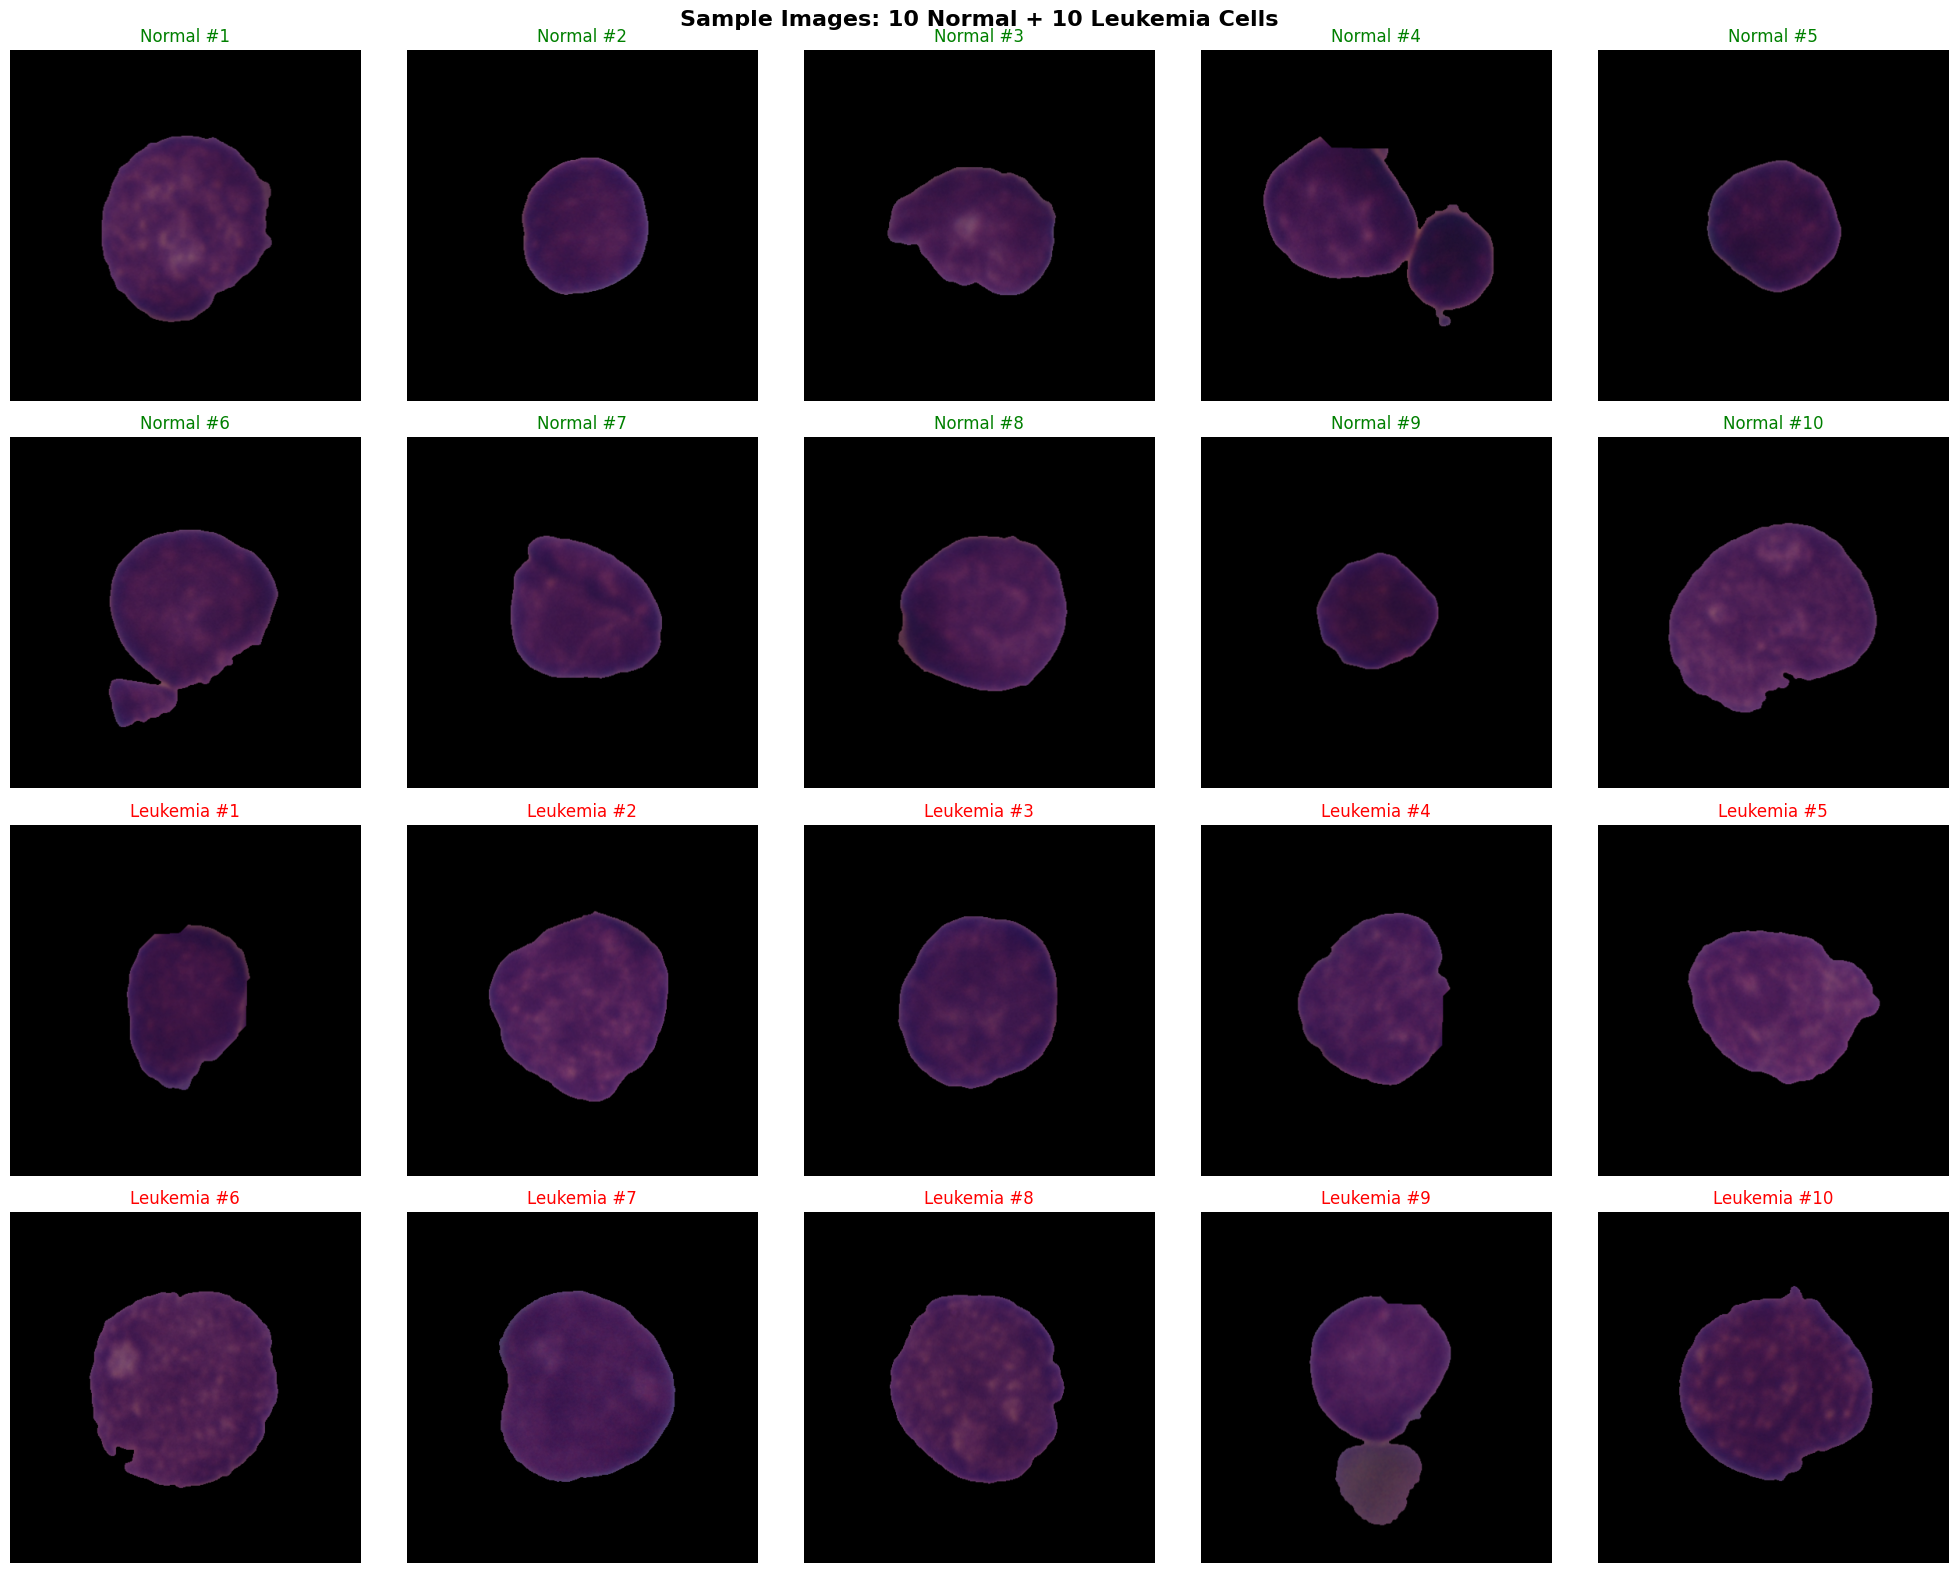

✅ Displayed 20 images (10 normal + 10 leukemia)


In [6]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Paths
fold_0_path = os.path.join(train_path, 'fold_0')
normal_folder = os.path.join(fold_0_path, 'hem')
leukemia_folder = os.path.join(fold_0_path, 'all')

# Get 10 images from each class
normal_images = os.listdir(normal_folder)[:10]
leukemia_images = os.listdir(leukemia_folder)[:10]

# Create a 4x5 grid (20 images total)
fig, axes = plt.subplots(4, 5, figsize=(20, 16))
axes = axes.flatten()

# Display 10 normal cells
for i in range(10):
    img_path = os.path.join(normal_folder, normal_images[i])
    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].set_title(f'Normal #{i+1}', fontsize=12, color='green')
    axes[i].axis('off')

# Display 10 leukemia cells
for i in range(10):
    img_path = os.path.join(leukemia_folder, leukemia_images[i])
    img = Image.open(img_path)
    axes[i+10].imshow(img)
    axes[i+10].set_title(f'Leukemia #{i+1}', fontsize=12, color='red')
    axes[i+10].axis('off')

plt.suptitle('Sample Images: 10 Normal + 10 Leukemia Cells', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print('✅ Displayed 20 images (10 normal + 10 leukemia)')

---
## 8️⃣ Check Image Shapes and Sizes

Analyze dimensions and file sizes of images.

In [7]:
from PIL import Image
import os
import numpy as np

# Sample 20 images from each class
normal_sample = os.listdir(normal_folder)[:20]
leukemia_sample = os.listdir(leukemia_folder)[:20]

# Collect image dimensions
normal_shapes = []
leukemia_shapes = []

print('🔍 Analyzing image dimensions...\n')

for img_name in normal_sample:
    img = Image.open(os.path.join(normal_folder, img_name))
    normal_shapes.append(img.size)  # (width, height)

for img_name in leukemia_sample:
    img = Image.open(os.path.join(leukemia_folder, img_name))
    leukemia_shapes.append(img.size)

# Convert to numpy arrays for analysis
normal_shapes = np.array(normal_shapes)
leukemia_shapes = np.array(leukemia_shapes)

print('📏 Normal Cell Images:')
print(f'   Average size: {normal_shapes.mean(axis=0).astype(int)} (width x height)')
print(f'   Min size: {normal_shapes.min(axis=0)}')
print(f'   Max size: {normal_shapes.max(axis=0)}')

print('\n📏 Leukemia Cell Images:')
print(f'   Average size: {leukemia_shapes.mean(axis=0).astype(int)} (width x height)')
print(f'   Min size: {leukemia_shapes.min(axis=0)}')
print(f'   Max size: {leukemia_shapes.max(axis=0)}')

# Check if images have consistent sizes
if len(set(map(tuple, normal_shapes))) == 1:
    print('\n✅ All normal images have the same dimensions')
else:
    print(f'\n⚠️ Normal images have {len(set(map(tuple, normal_shapes)))} different dimensions')

if len(set(map(tuple, leukemia_shapes))) == 1:
    print('✅ All leukemia images have the same dimensions')
else:
    print(f'⚠️ Leukemia images have {len(set(map(tuple, leukemia_shapes)))} different dimensions')

🔍 Analyzing image dimensions...

📏 Normal Cell Images:
   Average size: [450 450] (width x height)
   Min size: [450 450]
   Max size: [450 450]

📏 Leukemia Cell Images:
   Average size: [450 450] (width x height)
   Min size: [450 450]
   Max size: [450 450]

✅ All normal images have the same dimensions
✅ All leukemia images have the same dimensions


---
## 9️⃣ Dataset Summary

Key findings about the dataset.

In [8]:
print('=' * 60)
print('📊 DATASET SUMMARY')
print('=' * 60)

print(f'\n📁 Total Images: {total_normal + total_leukemia:,}')
print(f'   ├── Normal (hem): {total_normal:,} ({total_normal/(total_normal+total_leukemia)*100:.1f}%)')
print(f'   └── Leukemia (all): {total_leukemia:,} ({total_leukemia/(total_normal+total_leukemia)*100:.1f}%)')

print(f'\n📂 Number of Folds: 3')
print(f'   └── fold_0, fold_1, fold_2')

print(f'\n📏 Image Dimensions:')
print(f'   └── Vary across images (need resizing for model)')

print(f'\n🎯 Task: Binary Classification')
print(f'   └── Normal vs Leukemia')

print(f'\n⚠️ Class Balance:')
if abs(total_normal - total_leukemia) / (total_normal + total_leukemia) < 0.1:
    print(f'   ✅ Dataset is relatively balanced')
else:
    print(f'   ⚠️ Dataset is imbalanced - consider class weighting')

print('\n' + '=' * 60)

📊 DATASET SUMMARY

📁 Total Images: 10,661
   ├── Normal (hem): 3,389 (31.8%)
   └── Leukemia (all): 7,272 (68.2%)

📂 Number of Folds: 3
   └── fold_0, fold_1, fold_2

📏 Image Dimensions:
   └── Vary across images (need resizing for model)

🎯 Task: Binary Classification
   └── Normal vs Leukemia

⚠️ Class Balance:
   ⚠️ Dataset is imbalanced - consider class weighting



---
## 🔟 Save Notebook to Google Drive

Save this notebook to your Drive for future use.

In [ ]:
# Copy notebook to Google Drive
import shutil
import os

# Create project folder in Drive
drive_project_path = '/content/drive/My Drive/Leukemia_Classification_Project'
os.makedirs(drive_project_path, exist_ok=True)

print(f'✅ Project folder created at: {drive_project_path}')
print('\n💡 To save this notebook:')
print('   File → Save a copy in Drive → Save to your project folder')

---
## ✅ Next Steps

1. ✅ **Explored dataset structure**
2. ✅ **Counted images: Normal vs Leukemia**
3. ✅ **Displayed 20 sample images**
4. ✅ **Analyzed image shapes and sizes**

### 🎯 What's Next:
- Preprocess images (resize, normalize)
- Split data into train/validation/test
- Build CNN model
- Train and evaluate

---

**📝 Remember to save this notebook to GitHub!**

**How to save to GitHub:**
1. File → Download → Download .ipynb
2. Go to your GitHub repository
3. Upload the file
4. Commit with message: "Added data exploration notebook"